# Bridge and Air Pollution in Mekong Delta
## Background
#### Mekong Delta in Vietnam is shaped around the Mekong River, splitting into 7 major branches. Previously, transportation between different sides of the rivers rely on ferry systems. However, due to increased in demands for more efficient transportation infastructure, major bridges were built to replace the existing ferry system. To analyze improvement in transportation efficiency, air pollutions before and after bridges are analyzed.  
| Bridge | Year |
| --- | --- |
| My Thuan | 2000|
| Rach Mieu | 2009 |
| Ham Luong | 2010 |
| Can Tho | 2010 |
| My Loi | 2015|
| Co Chien | 2015 |
| Cao Lanh | 2018 |
| Vam Cong | 2019 |

## Data Source and Cleaning
#### Air Pollution from transportation includes CO, NOx, and PM. Due to a lack of air quality sensor in Vietnam, I used remote sensing data of air pollution column density. I need dataset that spans at least 2009 - 2019 with the highest possible resolution and coverage. I have done preliminary analysis on NO2 and Aerosol data. I uploaded these dataset to google earth engine and calculate monthly mean for each dataset from 2007 to 2019.

### NO2
#### I used QA4ECV Project data, which uses combination of OMI, GOME, and SCIAMACHY datasets. The dataset spans from 2004 to now, with a spatial resolution 0.125 arc degrees (22 km) and a near daily temporal resolution. For low resolution NO2 dataset, I only need to extract the pixel value the bridge is in. For additional control, before and after bridge, I include neighboring pixels of the birdge pixel. 

### Aerosol
#### I used Modis terra and aqua dataset, which spans from 2000 to now, with a spatial resolution of 1km. Because of the high resolution, the bridge crosses through multiple pixels. Thus, I extract mean value over the bridge region. 


In [1]:
import os
os.getcwd()
os.chdir('C:\\Users\\thaon\\Documents\\RProject\\Output')
from IPython.display import Image


## Regression and Results
### Regression on NO2
#### NO2 = B0 + B1_Bridge + B2_Year + month + location (1)
#### NO2 = B0 + B1_Bridge + B2_Year + month (2)
#### Bridge is a dummy variable that is 1 when the bridge is in operation, and 0 otherwise. Model has full month and location of the bridge fixed effects, or just month fixed effects. Bridge is estimated to decrease NO2 air column density. Its significance varies with the model specification. 

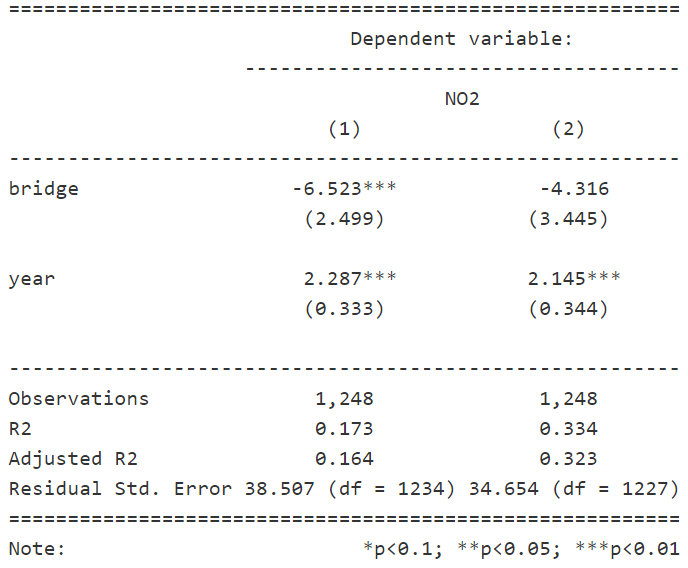

In [9]:
Image("NO2.png")

#### This decrease is potentially due to decrease in emission from ferries due to closure of ferries. Therefore, we will add control pixels before and after bridge to eliminate the effect of the ferries. The first test control I did is create 3x3 neighborhood around the bridge pixel. Calculating mean No2 of the neighborhod and regress them like the equations above. the results are not statistically significant from zero.

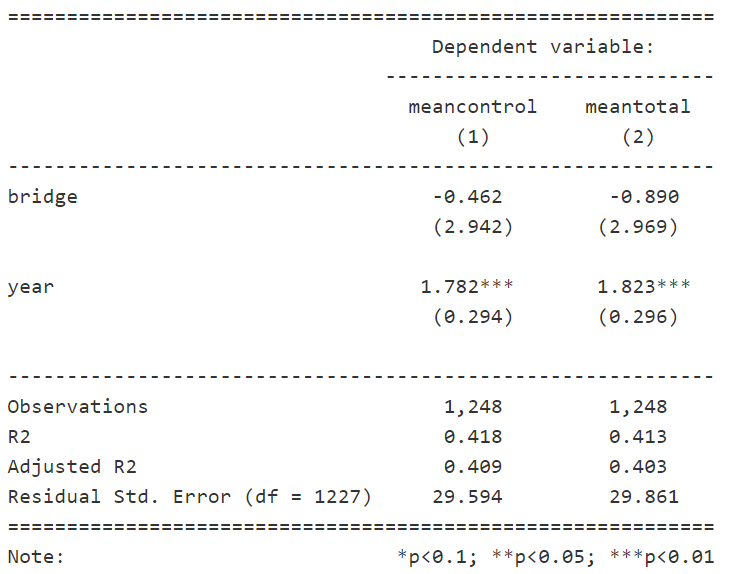

In [11]:
Image("NO2_3x3.png")

#### Because of the big neighborhood, the effect might be diluted. Thus we also choose two pixels with the highest averages over the entire time period 2007 - 2019 and regress them similarly. The results are not statistically significant from zero. 


Note m1 represents the pixel with the highest average and m2 represents the pixel with the second highest average


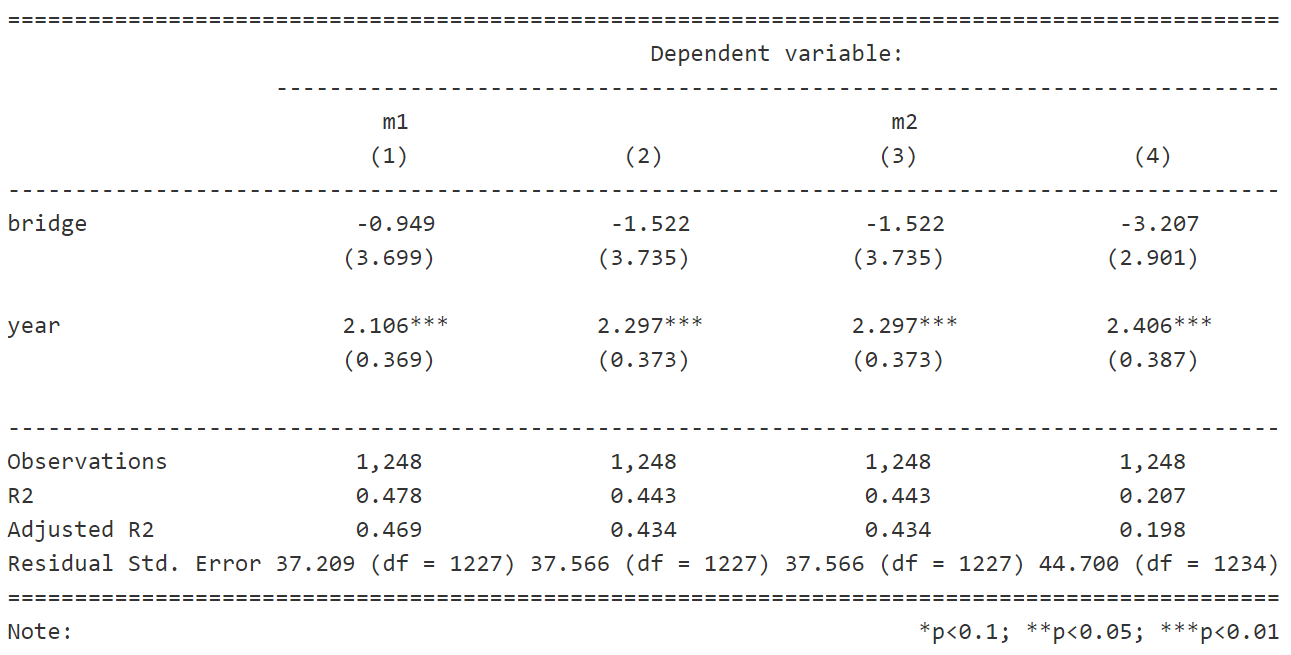

In [16]:
print("Note m1 represents the pixel with the highest average and m2 represents the pixel with the second highest average")
Image("NO2_max.png")


Note meantotal is the mean of the two highest averages pixel and the bridge pixel. Meancontrol is just the mean of the two highest averages pixel.


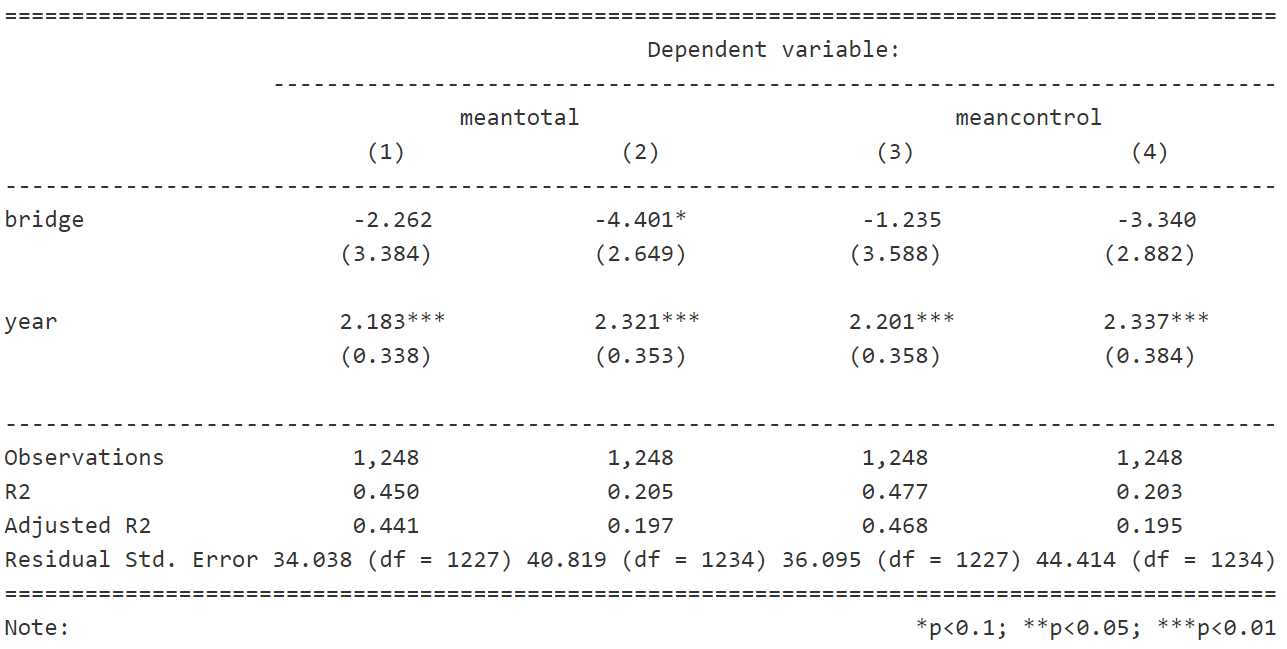

In [19]:
print("Note meantotal is the mean of the two highest averages pixel and the bridge pixel. Meancontrol is just the mean of the two highest averages pixel.")
Image("NO_mcmt.png")


### Regression on Aerosol Optical Depth
#### AOD = B0 + B1_Bridge + B2_Year + month + location
#### AOD = B0 + B1_Bridge + B2_Year + month
#### Results for Aerosols is opposite to that of NO2. Bridges are estimated to increase AOD.

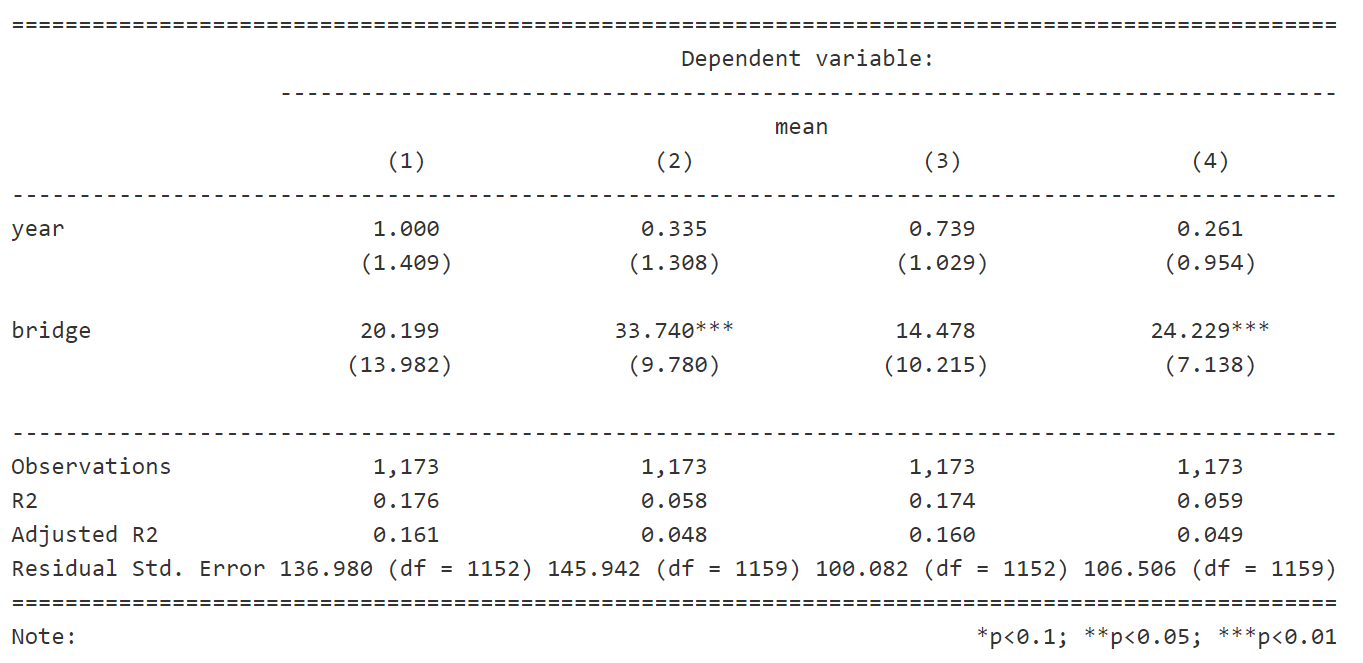

In [21]:
Image("AOD.png")

## Examples of time series of NO2 and AOD trends at a random bridge. 
#### Note: vertical grey line denotes when the bridge is built

NO2 trend at Can Tho Bridge
NO2 trend at Co Chien Bridge


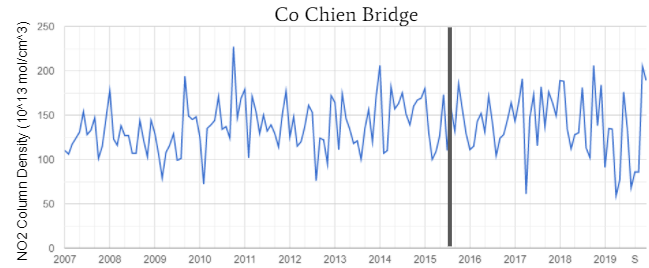

In [3]:
print("NO2 trend at Can Tho Bridge")
Image("CT_NO2.png")



In [ ]:
print("NO2 trend at Co Chien Bridge")
Image("CC_NO2.png")

AOD trend at Can Tho Bridge
AOD trend at Co Chien Bridge


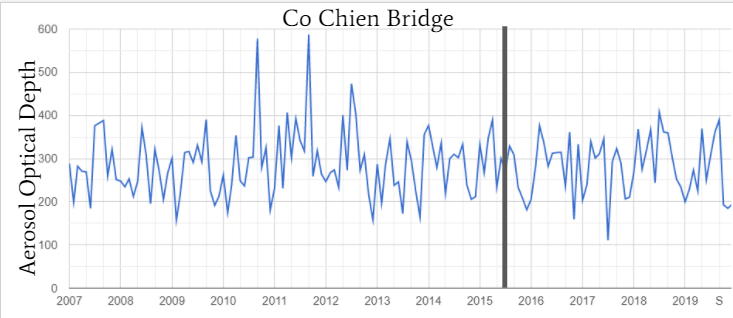

In [4]:
print("AOD trend at Can Tho Bridge")
Image("CT_AOD.png")



In [ ]:
print("AOD trend at Co Chien Bridge")
Image("CC_AOD.png")